In [ ]:
#Website Traffic Forecasting using ARIMA, xgboost and  Prophet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error,mean_absolute_percentage_error,median_absolute_error,r2_score,mean_squared_log_error

In [ ]:
df= pd.read_csv("/content/Thecleverprogrammer.csv")
df.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [ ]:
df.dtypes

,0
Date,object
Views,int64


In [ ]:
df["Date"]=pd.to_datetime(df["Date"], format='%d/%m/%Y', errors='coerce')

In [ ]:
df.describe()

,Date,Views
count,391,391.000000
mean,2021-12-13 00:00:00,8482.606138
min,2021-06-01 00:00:00,4478.000000
25%,2021-09-06 12:00:00,7603.000000
50%,2021-12-13 00:00:00,8363.000000
75%,2022-03-20 12:00:00,9304.000000
max,2022-06-26 00:00:00,12156.000000
std,NaN,1279.661279


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB


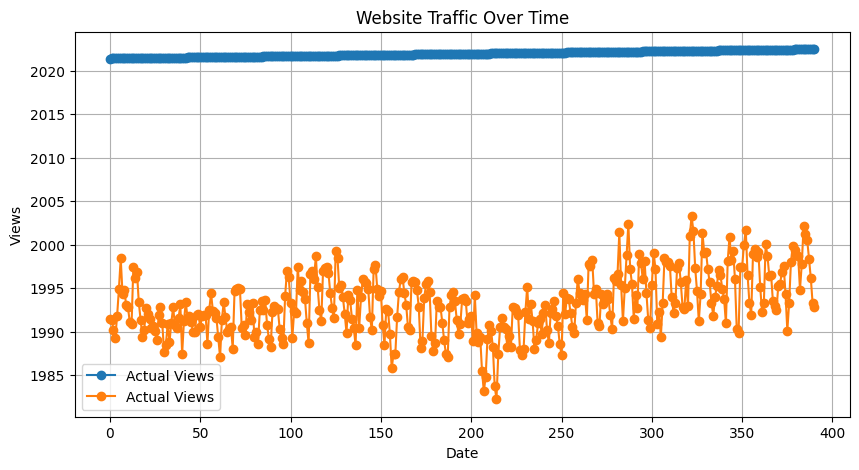

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df, label="Actual Views", marker="o")
plt.xlabel("Date")
plt.ylabel("Views")
plt.title("Website Traffic Over Time")
plt.legend()
plt.grid()
plt.show()

In [ ]:
model = ARIMA(df["Views"], order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Views   No. Observations:                  391
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3212.690
Date:                Wed, 12 Mar 2025   AIC                           6431.381
Time:                        11:07:41   BIC                           6443.279
Sample:                             0   HQIC                          6436.097
                                - 391                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5475      0.049     11.231      0.000       0.452       0.643
ma.L1         -0.9523      0.019    -49.568      0.000      -0.990      -0.915
sigma2      8.262e+05   6.45e+04     12.808      0.0

In [ ]:
forecast=model_fit.forecast(steps=30)
forecast_dates = pd.date_range(start=pd.Timestamp(df.index[-1]) + pd.Timedelta(days=1), periods=30)
forecast_df = pd.DataFrame({"Date": forecast_dates, "Predicted Views": forecast})
forecast_df.set_index("Date", inplace=True)

print(forecast_df)

                               Predicted Views
Date                                          
1970-01-02 00:00:00.000000390      8946.150776
1970-01-03 00:00:00.000000390      9262.659572
1970-01-04 00:00:00.000000390      9435.932395
1970-01-05 00:00:00.000000390      9530.790648
1970-01-06 00:00:00.000000390      9582.720824
1970-01-07 00:00:00.000000390      9611.150012
1970-01-08 00:00:00.000000390      9626.713579
1970-01-09 00:00:00.000000390      9635.233857
1970-01-10 00:00:00.000000390      9639.898286
1970-01-11 00:00:00.000000390      9642.451829
1970-01-12 00:00:00.000000390      9643.849767
1970-01-13 00:00:00.000000390      9644.615068
1970-01-14 00:00:00.000000390      9645.034033
1970-01-15 00:00:00.000000390      9645.263395
1970-01-16 00:00:00.000000390      9645.388959
1970-01-17 00:00:00.000000390      9645.457699
1970-01-18 00:00:00.000000390      9645.495331
1970-01-19 00:00:00.000000390      9645.515933
1970-01-20 00:00:00.000000390      9645.527211
1970-01-21 00

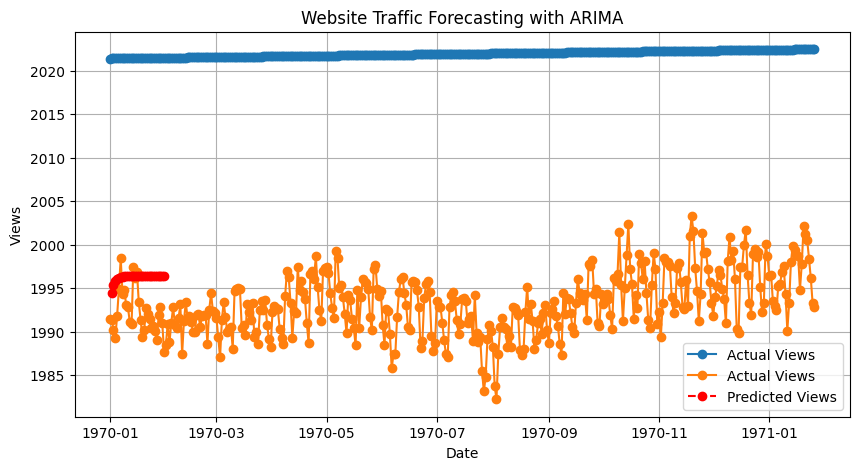

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df, label="Actual Views", marker="o")
plt.plot(forecast_df, label="Predicted Views", linestyle="dashed", marker="o", color='red')
plt.xlabel("Date")
plt.ylabel("Views")
plt.title("Website Traffic Forecasting with ARIMA")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#xgboost

In [ ]:
x=df['Date']
y=df['Views']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(312,)
(79,)
(312,)
(79,)


In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train.values.reshape(-1,1))
x_test=scaler.transform(x_test.values.reshape(-1,1))

In [ ]:
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.5)

model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model.score(x_train,y_train)

0.9455484747886658

In [ ]:
model.score(x_test,y_test)

0.26514315605163574

In [ ]:
y_pred=model.predict(x_test)
print(y_pred)

[ 7448.364   7663.021   9239.508   8517.339   9239.508   7929.5527
 10318.38    8338.475   9262.814   9983.812   8576.328   7879.59
 10539.786   9438.999   8721.9     7425.804  10165.41    9112.103
  6720.49    9599.379  11541.5625  7970.6143  9517.581   7693.036
  9112.103   8679.05    8729.98    9013.733   8701.75    8353.049
  7137.6416  8774.335   8338.475   9501.045   7962.952   8571.122
  9239.508   6676.717   7843.2744  6676.717   4925.2554  8493.697
  8721.9     8698.058   7812.423   9599.379   7949.958  10298.153
 10298.153   9100.067   8264.39    7663.021   8576.328   9848.987
  7624.6475  7475.5537  6176.56   10502.273   9112.103   9688.088
  7156.5903  8721.9     8862.405  10280.167   8912.985   9848.987
  7131.0356  7475.5537  8686.874   9239.508   8685.859   7858.557
 11252.185   7475.5537  8708.683   8721.9     7915.021   8114.9893
  6482.619 ]


In [ ]:
predicted_reach_original=scaler.inverse_transform(y_pred.reshape(-1,1))
print(predicted_reach_original)

[[7.4968133e+19]
 [7.7081430e+19]
 [9.2601890e+19]
 [8.5492157e+19]
 [9.2601890e+19]
 [7.9705419e+19]
 [1.0322336e+20]
 [8.3731250e+19]
 [9.2831345e+19]
 [9.9929537e+19]
 [8.6072910e+19]
 [7.9213541e+19]
 [1.0540309e+20]
 [9.4565872e+19]
 [8.7506058e+19]
 [7.4746032e+19]
 [1.0171737e+20]
 [9.1347593e+19]
 [6.7802233e+19]
 [9.6144815e+19]
 [1.1526555e+20]
 [8.0109670e+19]
 [9.5339515e+19]
 [7.7376926e+19]
 [9.1347593e+19]
 [8.7084197e+19]
 [8.7585610e+19]
 [9.0379152e+19]
 [8.7307680e+19]
 [8.3874732e+19]
 [7.1909076e+19]
 [8.8022283e+19]
 [8.3731250e+19]
 [9.5176717e+19]
 [8.0034243e+19]
 [8.6021656e+19]
 [9.2601890e+19]
 [6.7371286e+19]
 [7.8856015e+19]
 [6.7371286e+19]
 [5.0128200e+19]
 [8.5259413e+19]
 [8.7506058e+19]
 [8.7271334e+19]
 [7.8552286e+19]
 [9.6144815e+19]
 [7.9906313e+19]
 [1.0302422e+20]
 [1.0302422e+20]
 [9.1229101e+19]
 [8.3001886e+19]
 [7.7081430e+19]
 [8.6072910e+19]
 [9.8602197e+19]
 [7.6703638e+19]
 [7.5235816e+19]
 [6.2447260e+19]
 [1.0503378e+20]
 [9.1347593e+1

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
print(mae)

830.5574340820312


In [ ]:
mse= mean_squared_error(y_test,y_pred)
print(mse)

1057595.875


In [ ]:
print(r2_score(y_test,y_pred))

0.26514315605163574


In [ ]:
print(median_absolute_error(y_test,y_pred))

761.328125


In [ ]:
root_mean_squared_error = np.sqrt(mse)
print(root_mean_squared_error)

1028.3948050238293


In [ ]:
root_mean_squared_log_error = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(root_mean_squared_log_error)

0.12026706122370573


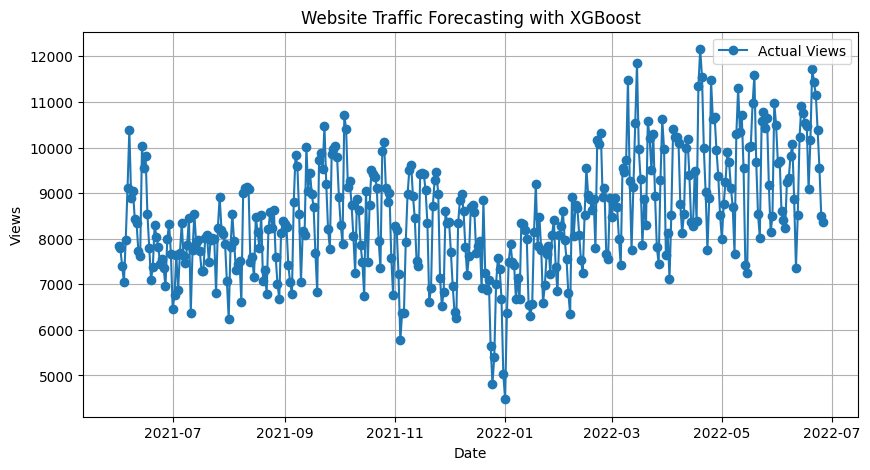

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df["Date"], df["Views"], label="Actual Views", marker="o")
plt.xlabel("Date")
plt.ylabel("Views")
plt.title("Website Traffic Forecasting with XGBoost")
plt.legend()
plt.grid()
plt.show()

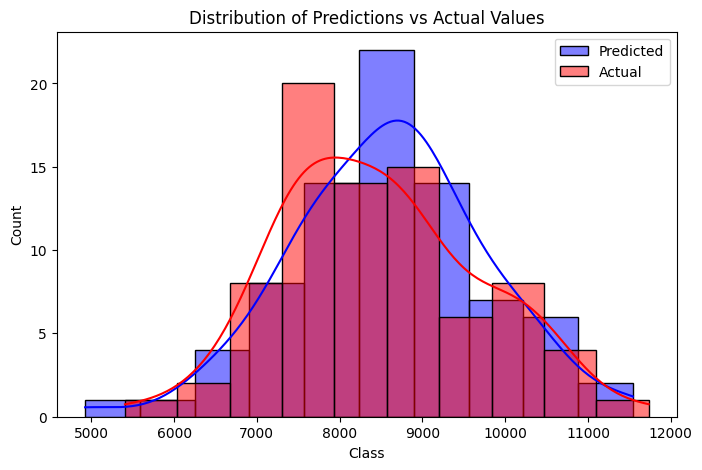

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


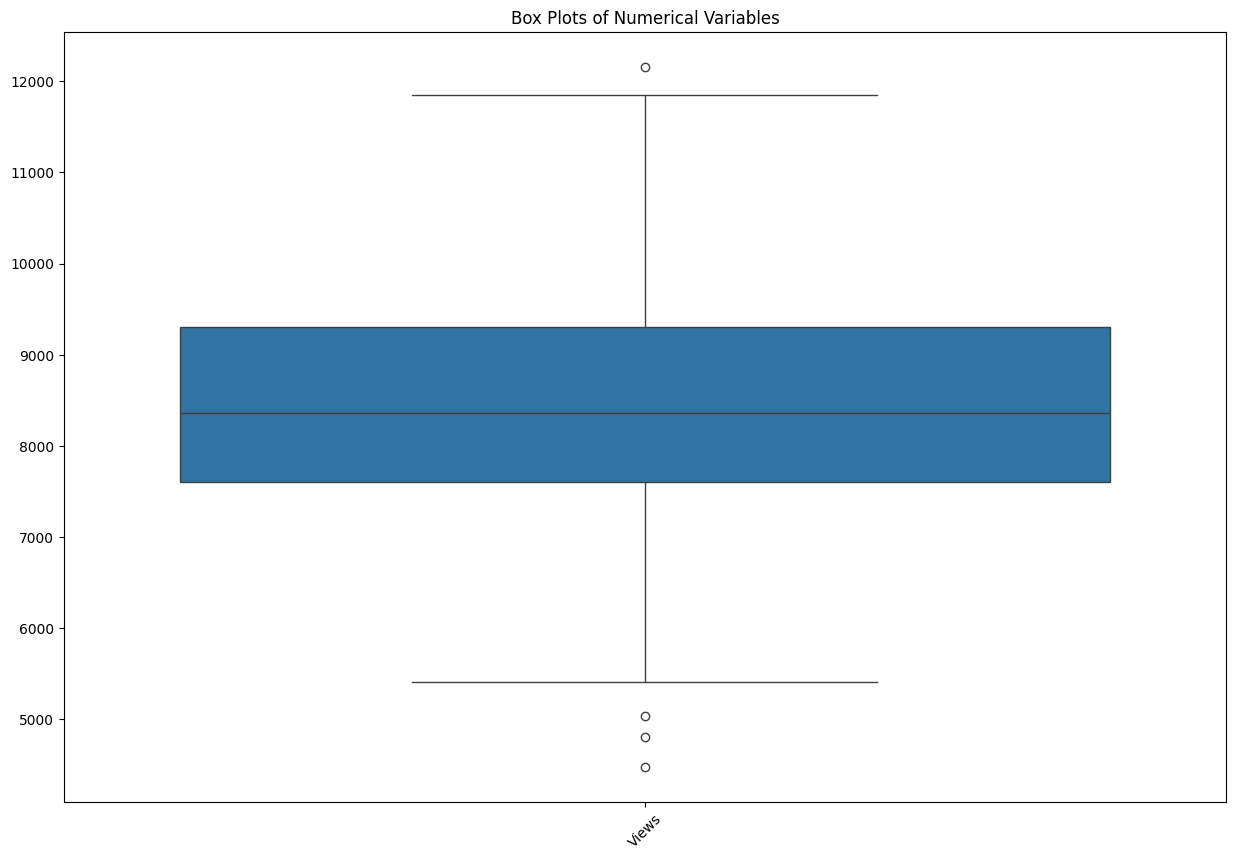

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Box Plots of Numerical Variables")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Prophet

In [ ]:
df.rename(columns={"Date": "ds", "Views": "y"}, inplace=True)

In [ ]:
pmodel=Prophet()
pmodel.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalu0og1t/2ati5_7h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalu0og1t/i163qgbg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20829', 'data', 'file=/tmp/tmpalu0og1t/2ati5_7h.json', 'init=/tmp/tmpalu0og1t/i163qgbg.json', 'output', 'file=/tmp/tmpalu0og1t/prophet_modeleby6_kwe/prophet_model-20250312114634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:46:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=pmodel.make_future_dataframe(periods=30)
forecast=pmodel.predict(future)
print(forecast)

            ds         trend  ...  multiplicative_terms_upper          yhat
0   2021-06-01   7882.278612  ...                         0.0   8706.031460
1   2021-06-02   7886.000499  ...                         0.0   8426.507394
2   2021-06-03   7889.722385  ...                         0.0   8164.001982
3   2021-06-04   7893.444272  ...                         0.0   7497.662830
4   2021-06-05   7897.166159  ...                         0.0   7004.598660
..         ...           ...  ...                         ...           ...
416 2022-07-22  10534.262417  ...                         0.0  10138.480974
417 2022-07-23  10547.731522  ...                         0.0   9655.164023
418 2022-07-24  10561.200627  ...                         0.0   9508.986601
419 2022-07-25  10574.669733  ...                         0.0  11276.693361
420 2022-07-26  10588.138838  ...                         0.0  11411.891686

[421 rows x 16 columns]


In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

            ds          yhat    yhat_lower    yhat_upper
391 2022-06-27  10899.558409   9910.545001  11907.170715
392 2022-06-28  11034.756734  10088.602467  12032.005781
393 2022-06-29  10764.979886   9763.047692  11763.344169
394 2022-06-30  10512.221693   9515.926646  11467.845336
395 2022-07-01   9855.629760   8906.065092  10854.636998
396 2022-07-02   9372.312809   8422.817220  10386.042581
397 2022-07-03   9226.135387   8245.790063  10210.053975
398 2022-07-04  10993.842147  10039.664507  12031.523833
399 2022-07-05  11129.040472  10106.111996  12112.979918
400 2022-07-06  10859.263624   9796.941891  11865.083793
401 2022-07-07  10606.505431   9628.036444  11648.092641
402 2022-07-08   9949.913498   8879.047963  10908.976956
403 2022-07-09   9466.596547   8507.911129  10459.704607
404 2022-07-10   9320.419125   8236.513755  10282.602615
405 2022-07-11  11088.125885  10109.934556  12126.674050
406 2022-07-12  11223.324210  10187.578312  12201.629360
407 2022-07-13  10953.547363   

<Figure size 1000x500 with 0 Axes>

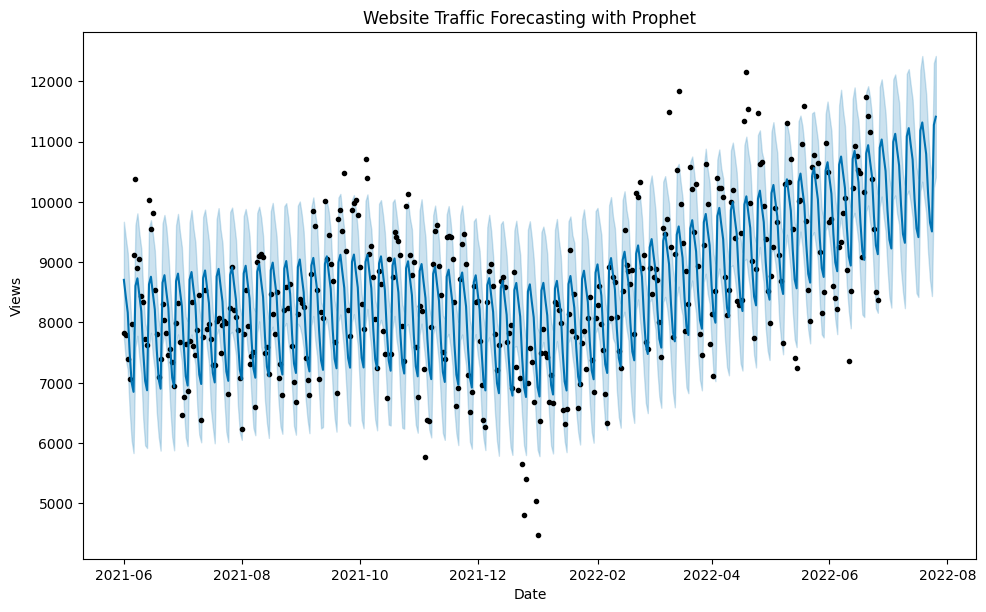

In [ ]:
plt.figure(figsize=(10,5))
pmodel.plot(forecast)
plt.title("Website Traffic Forecasting with Prophet")
plt.xlabel("Date")
plt.ylabel("Views")
plt.grid()
plt.show()


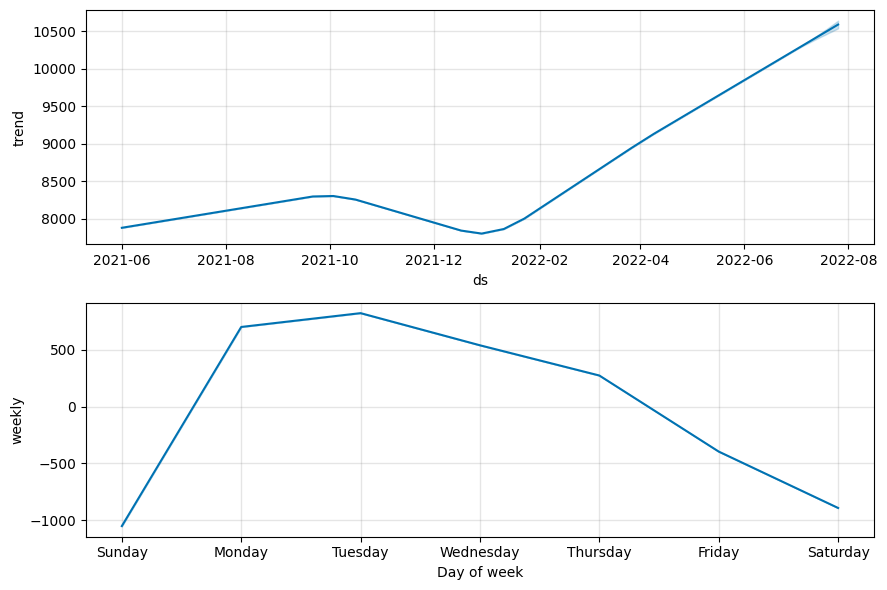

In [ ]:
pmodel.plot_components(forecast)
plt.show()